In [40]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [41]:
C=20
g=5
start_value=1 #это для ламда 1
last_value=20
lambda2=2
mu=1.5
rho2=0
k=0
lambda1=[]
rho1=[]
B1=[]
B2=[]
p=[[]]
step=0.5

In [42]:
#def factorial(i): # это для факториала
    #fc = 1
    #for j in range(2, i+1):
        #fc = fc*j;
    #return fc


In [43]:
def vertn(C, rho1, rho2, p, g): #вероятности

    for n1 in range(0, g+1):
        for n2 in range(0, C+1):
            if n1+n2<C+1:
                p[n1][n2]=0

    for n1 in range(0, g+1):
        for n2 in range(0, C+1):
            if n1+n2<C+1:
                p[0][0] = p[0][0] + math.pow(rho1, n1) * math.pow(rho2, n2) / (math.factorial(n1)*math.factorial(n2))

    p[0][0] = 1/p[0][0];

    for n1 in range(0, g+1):
        for n2 in range(0, C+1):
            if ((n1==0) and (n2==0)):
                continue
            else:
                if (n1+n2<C+1):
                    p[n1][n2] = p[0][0] * math.pow(rho1, n1) * math.pow(rho2, n2) / (math.factorial(n1)*math.factorial(n2))
    return p

In [60]:
p[0][0]

4.9484932253003285e-05

In [61]:
p

array([[4.94849323e-05, 6.59799097e-05, 4.39866064e-05, 1.95496029e-05,
        6.51653429e-06, 1.73774248e-06, 3.86164995e-07, 7.35552371e-08,
        1.22592062e-08, 1.81617869e-09, 2.42157159e-10, 2.93523829e-11,
        3.26137588e-12, 3.34500090e-13, 3.18571515e-14, 2.83174680e-15,
        2.35978900e-16, 1.85081490e-17, 1.37097400e-18, 9.62087018e-20,
        6.41391345e-21],
       [6.59799097e-04, 8.79732129e-04, 5.86488086e-04, 2.60661372e-04,
        8.68871238e-05, 2.31698997e-05, 5.14886660e-06, 9.80736495e-07,
        1.63456082e-07, 2.42157159e-08, 3.22876212e-09, 3.91365106e-10,
        4.34850118e-11, 4.46000121e-12, 4.24762020e-13, 3.77566240e-14,
        3.14638533e-15, 2.46775320e-16, 1.82796533e-17, 1.28278269e-18,
        0.00000000e+00],
       [4.39866064e-03, 5.86488086e-03, 3.90992057e-03, 1.73774248e-03,
        5.79247492e-04, 1.54465998e-04, 3.43257773e-05, 6.53824330e-06,
        1.08970722e-06, 1.61438106e-07, 2.15250808e-08, 2.60910071e-09,
        2.8990

In [44]:
while(start_value<=last_value):
    start_value += step
    k=k+1

start_value=1

B1 = np.zeros(k)
N = np.zeros(k)
N1 = np.zeros(k)
N2 = np.zeros(k)
B2 = np.zeros(k)
lambda1 = np.zeros(k)
rho1 = np.zeros(k)

p = np.zeros((g+1, C+1))

lambda1[0]=start_value
for i in range(1, k):
    lambda1[i] = lambda1[i-1]+step

for i in range(0, k):
    rho1[i] = lambda1[i]/mu

rho2=lambda2/mu

In [45]:
lambda1[0]/mu

0.6666666666666666

In [46]:
for i in range(0,k):
    p=vertn(C, rho1[i], rho2, p, g)

    for n1 in range(0, g+1):
        for n2 in range(0, C+1):
            if (n1==g) or (n1+n2==C):
                B1[i]=B1[i]+p[n1][n2]
            if (n1+n2==C):
                B2[i]=B2[i]+p[n1][n2]
            if (n1+n2<(C+1)):
                N[i]=N[i]+(n1+n2)*p[n1][n2]
                N1[i]=N1[i]+(n1)*p[n1][n2]
                N2[i]=N2[i]+(n2)*p[n1][n2]

In [47]:
N

array([1.99962436, 2.33026585, 2.65429324, 2.96601636, 3.25993884,
       3.53196836, 3.77987814, 4.00317029, 4.20264677, 4.37993089,
       4.53706584, 4.67622775, 4.7995444 , 4.90899423, 5.00635969,
       5.09321462, 5.17093066, 5.24069363, 5.30352379, 5.36029684,
       5.41176387, 5.45856933, 5.50126691, 5.54033323, 5.57617948,
       5.60916138, 5.63958745, 5.66772611, 5.69381156, 5.71804875,
       5.74061756, 5.76167636, 5.78136495, 5.7998071 , 5.81711271,
       5.8333796 , 5.84869507, 5.86313725, 5.87677621])

In [48]:
lambda1

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5,
       12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5, 17. ,
       17.5, 18. , 18.5, 19. , 19.5, 20. ])

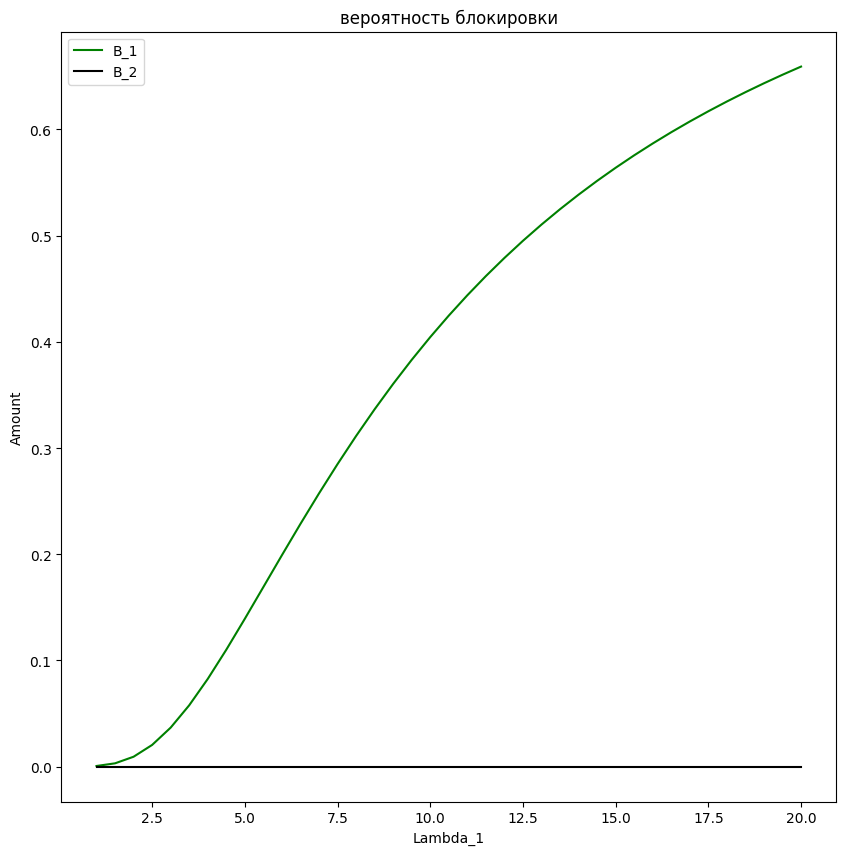

In [49]:
fig = plt.figure(figsize=(10,10))
plt.plot(lambda1, B1, label = "B_1", color='green')
plt.plot(lambda1, B2, label = "B_2", color='black')
plt.title("вероятность блокировки")
plt.xlabel("Lambda_1")
plt.ylabel("Amount")
plt.legend()

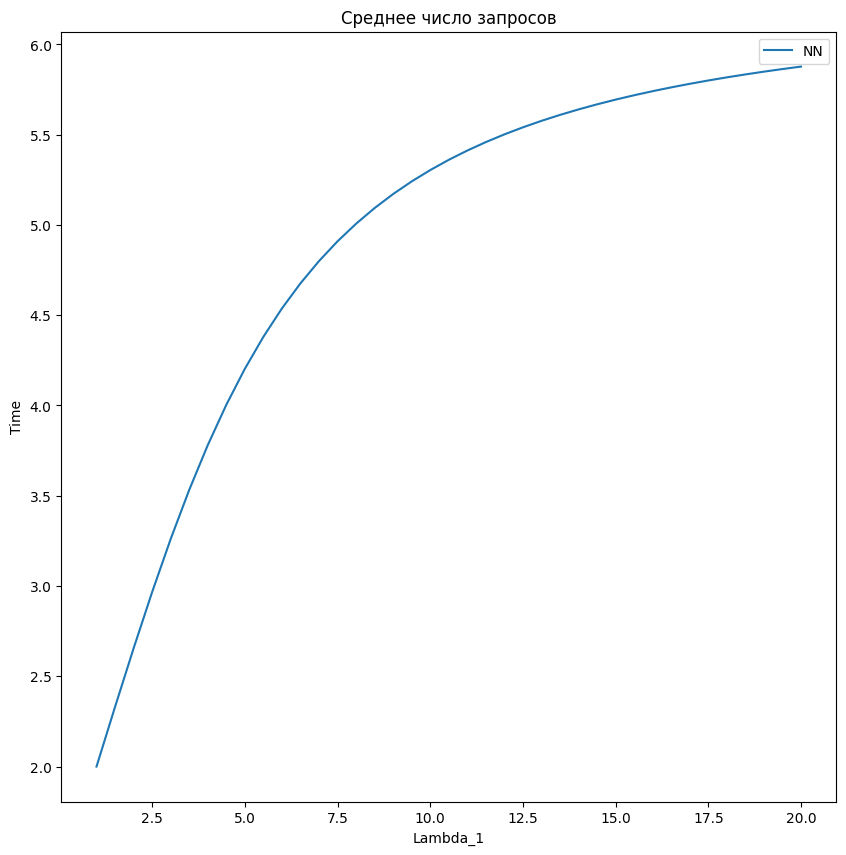

In [50]:
fig = plt.figure(figsize=(10,10))
plt.plot(lambda1, N, label = "NN")
plt.title("Среднее число запросов")
plt.xlabel("Lambda_1")
plt.ylabel("Time")
plt.legend()
plt.legend()

## Значения B_1 B_2 N_1 NT_2

In [51]:
B1[0]

0.000563459642211198

In [52]:
B2[0]

1.733745915125876e-14

In [53]:
N[0]

1.9996243602385038

In [54]:
N1[0]

0.6662910269051932

In [55]:
N2[0]

1.3333333333333113

## Распределение вероятности

In [56]:
p

array([[4.94849323e-05, 6.59799097e-05, 4.39866064e-05, 1.95496029e-05,
        6.51653429e-06, 1.73774248e-06, 3.86164995e-07, 7.35552371e-08,
        1.22592062e-08, 1.81617869e-09, 2.42157159e-10, 2.93523829e-11,
        3.26137588e-12, 3.34500090e-13, 3.18571515e-14, 2.83174680e-15,
        2.35978900e-16, 1.85081490e-17, 1.37097400e-18, 9.62087018e-20,
        6.41391345e-21],
       [6.59799097e-04, 8.79732129e-04, 5.86488086e-04, 2.60661372e-04,
        8.68871238e-05, 2.31698997e-05, 5.14886660e-06, 9.80736495e-07,
        1.63456082e-07, 2.42157159e-08, 3.22876212e-09, 3.91365106e-10,
        4.34850118e-11, 4.46000121e-12, 4.24762020e-13, 3.77566240e-14,
        3.14638533e-15, 2.46775320e-16, 1.82796533e-17, 1.28278269e-18,
        0.00000000e+00],
       [4.39866064e-03, 5.86488086e-03, 3.90992057e-03, 1.73774248e-03,
        5.79247492e-04, 1.54465998e-04, 3.43257773e-05, 6.53824330e-06,
        1.08970722e-06, 1.61438106e-07, 2.15250808e-08, 2.60910071e-09,
        2.8990

In [57]:
sum(p)

array([2.63597138e-01, 3.51462851e-01, 2.34308567e-01, 1.04137141e-01,
       3.47123803e-02, 9.25663475e-03, 2.05702995e-03, 3.91815228e-04,
       6.53025379e-05, 9.67445007e-06, 1.28992668e-06, 1.56354749e-07,
       1.73727498e-08, 1.78182050e-09, 1.69697190e-10, 1.50841947e-11,
       4.28338605e-13, 9.22231360e-15, 1.41514983e-16, 1.37899139e-18,
       6.41391345e-21])

In [58]:
sum(sum(p))

1.0000000000000002